In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/exchange_rates.csv')

print("Initial Data Overview:")
print(data.head())
print(data.info())

Initial Data Overview:
   Unnamed: 0  chinese_yuan      euro  japanese_yen  uk_pound  us_dollar  \
0  2004-01-02           NaN  0.794155           NaN  0.559973        1.0   
1  2004-01-05        8.2770  0.790077        106.90  0.555679        1.0   
2  2004-01-06        8.2771  0.783945        106.25  0.549179        1.0   
3  2004-01-07        8.2772  0.788706        106.24  0.551268        1.0   
4  2004-01-08        8.2772  0.791515        106.15  0.551815        1.0   

   algerian_dinar  australian_dollar  bahrain_dinar  botswana_pula  ...  \
0             NaN           1.328551          0.376            NaN  ...   
1             NaN           1.310616          0.376       4.326195  ...   
2             NaN           1.304121          0.376       4.354452  ...   
3             NaN           1.302592          0.376       4.418913  ...   
4             NaN           1.302253          0.376       4.464286  ...   

   south_african_rand  sri_lankan_rupee  swedish_krona  swiss_franc  

In [4]:
data.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

#Handle missing values with forward fill
data.fillna(method='ffill', inplace=True)
print("\nMissing values after forward-fill:")
print(data.isnull().sum())

#Focus on Euro exchange rate and create the 1-day lagged variable
euro_data = data[['euro']].copy()
euro_data['euro_lag_1'] = euro_data['euro'].shift(1)
euro_data.dropna(inplace=True)



Missing values after forward-fill:
chinese_yuan              1
euro                      0
japanese_yen              1
uk_pound                  0
us_dollar                 0
algerian_dinar         1651
australian_dollar         0
bahrain_dinar             0
botswana_pula             1
brazilian_real            0
brunei_dollar             0
canadian_dollar           0
chilean_peso              1
colombian_peso            0
czech_koruna              0
danish_krone              0
hungarian_forint          1
icelandic_krona           1
indian_rupee              0
indonesian_rupiah         1
iranian_rial              0
israeli_new_shekel        2
kazakhstani_tenge       495
korean_won                0
kuwaiti_dinar             2
libyan_dinar              1
malaysian_ringgit         1
mauritian_rupee           1
mexican_peso              0
nepalese_rupee            0
new_zealand_dollar        1
norwegian_krone           0
omani_rial                0
pakistani_rupee           0
peruvian_sol

<ipython-input-4-c4fe360fdace>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [5]:
X = euro_data[['euro_lag_1']]
y = euro_data['euro']

#(80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [6]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)


RandomForestRegressor(oob_score=True, random_state=42)

In [7]:
y_pred = rf_model.predict(X_test)

oob_score = rf_model.oob_score_
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Out-of-Bag Score: {oob_score}')
print("Mean Squared Error (MSE):", mse)
print('Mean Absolute Error (MAE):', mae)
print(f'R-squared Score: {r2}')


Out-of-Bag Score: 0.9948508067815014
Mean Squared Error (MSE): 0.0001995978640355459
Mean Absolute Error (MAE): 0.00704736401456525
R-squared Score: 0.9207432390481782


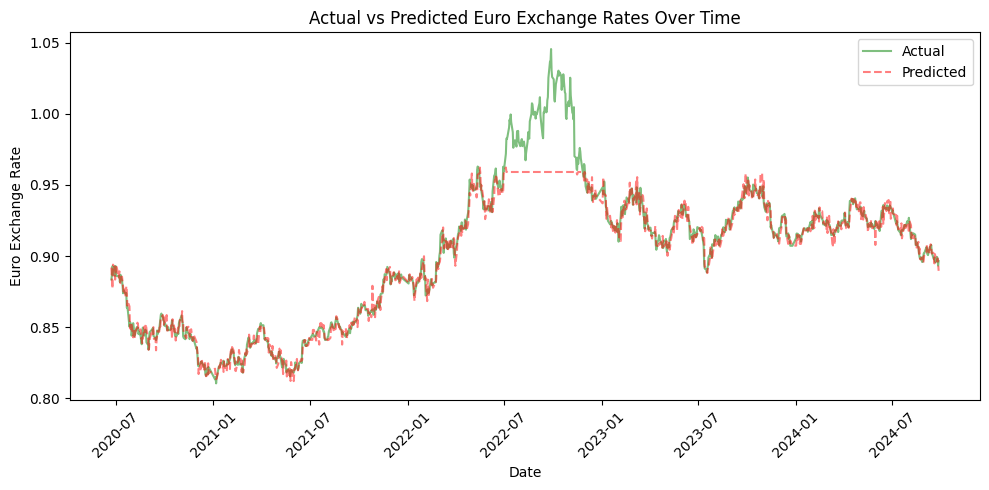

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, color='green', label='Actual', alpha=0.5)
plt.plot(y_test.index, y_pred, color='red', label='Predicted', linestyle='--', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Euro Exchange Rate')
plt.title('Actual vs Predicted Euro Exchange Rates Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
